# Lab 3

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 12345

In [13]:
# Load data
data = pd.read_csv("sonar.all-data", header=None)

In [14]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [15]:
data.shape

(208, 61)

In [16]:
data.isnull().sum().sum()

0

### Let's separate the data labels from the dataset.

In [17]:
# Drops row or column
X = data.drop(60, axis=1)

In [19]:
# Column
Y = data[60]
Y = data.iloc[:, -1]

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
#  train_test_split method splits data into test and train sets. 
# 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_SEED, stratify=Y)

## Perceptron - binary classifier having one weight and one bias value w * x + b

In [24]:
from sklearn.linear_model import Perceptron

In [25]:
# create Perceptron instance with maximum iteration 100 and without shuffle and tol values

ppn = Perceptron(max_iter=100, tol=None, shuffle=False)

In [26]:
# call the fit() function with dataset and label
ppn.fit(X_train, Y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=False, tol=None,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
# now the instance has trained weight and bias. Now get the test error with score() function. 
ppn.score(X_test, Y_test)

0.6825396825396826

In [28]:
# now see the predicted labels by calling predict() function
ppn.predict(X_test)

array([&#39;R&#39;, &#39;R&#39;, &#39;M&#39;, &#39;R&#39;, &#39;M&#39;, &#39;R&#39;, &#39;R&#39;, &#39;R&#39;, &#39;R&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;,
       &#39;M&#39;, &#39;R&#39;, &#39;M&#39;, &#39;R&#39;, &#39;R&#39;, &#39;R&#39;, &#39;R&#39;, &#39;R&#39;, &#39;M&#39;, &#39;R&#39;, &#39;M&#39;, &#39;M&#39;, &#39;R&#39;,
       &#39;R&#39;, &#39;M&#39;, &#39;R&#39;, &#39;M&#39;, &#39;R&#39;, &#39;R&#39;, &#39;R&#39;, &#39;R&#39;, &#39;R&#39;, &#39;M&#39;, &#39;M&#39;, &#39;R&#39;, &#39;M&#39;,
       &#39;M&#39;, &#39;R&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;R&#39;, &#39;M&#39;, &#39;R&#39;, &#39;R&#39;, &#39;M&#39;, &#39;R&#39;, &#39;R&#39;, &#39;M&#39;,
       &#39;R&#39;, &#39;R&#39;, &#39;R&#39;, &#39;R&#39;, &#39;M&#39;, &#39;M&#39;, &#39;R&#39;, &#39;R&#39;, &#39;R&#39;, &#39;R&#39;, &#39;M&#39;], dtype=&#39;&lt;U1&#39;)

In [29]:
# if tol parameter is set, the algorithm might finish earlier than the maximum iteration. Can also check it as it is stored in n_iter_ variable in the instance
ppn.n_iter_

100

# KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [32]:
neigh.fit(X_train, Y_train)

KNeighborsClassifier(algorithm=&#39;auto&#39;, leaf_size=30, metric=&#39;minkowski&#39;,
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights=&#39;uniform&#39;)

In [33]:
neigh.score(X_test, Y_test)

0.8253968253968254

In [34]:
neigh.predict(X_test)

array([&#39;R&#39;, &#39;R&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;R&#39;, &#39;R&#39;, &#39;R&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;,
       &#39;R&#39;, &#39;R&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;R&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;,
       &#39;R&#39;, &#39;R&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;R&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;R&#39;, &#39;R&#39;, &#39;M&#39;,
       &#39;M&#39;, &#39;R&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;R&#39;, &#39;M&#39;, &#39;R&#39;, &#39;R&#39;, &#39;M&#39;, &#39;M&#39;, &#39;R&#39;, &#39;M&#39;,
       &#39;R&#39;, &#39;R&#39;, &#39;R&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;R&#39;],
      dtype=object)

# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dtc = DecisionTreeClassifier(random_state=RANDOM_SEED)

In [37]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion=&#39;gini&#39;,
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=&#39;deprecated&#39;,
                       random_state=12345, splitter=&#39;best&#39;)

In [38]:
dtc.score(X_test, Y_test)

0.746031746031746

In [39]:
dtc.predict(X_test)

array([&#39;R&#39;, &#39;R&#39;, &#39;R&#39;, &#39;M&#39;, &#39;M&#39;, &#39;R&#39;, &#39;R&#39;, &#39;R&#39;, &#39;R&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;,
       &#39;R&#39;, &#39;R&#39;, &#39;M&#39;, &#39;R&#39;, &#39;M&#39;, &#39;M&#39;, &#39;R&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;R&#39;,
       &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;R&#39;, &#39;R&#39;, &#39;R&#39;, &#39;M&#39;, &#39;R&#39;, &#39;M&#39;, &#39;M&#39;, &#39;R&#39;, &#39;M&#39;,
       &#39;R&#39;, &#39;R&#39;, &#39;M&#39;, &#39;M&#39;, &#39;M&#39;, &#39;R&#39;, &#39;M&#39;, &#39;R&#39;, &#39;M&#39;, &#39;M&#39;, &#39;R&#39;, &#39;R&#39;, &#39;M&#39;,
       &#39;M&#39;, &#39;R&#39;, &#39;R&#39;, &#39;R&#39;, &#39;M&#39;, &#39;M&#39;, &#39;R&#39;, &#39;M&#39;, &#39;R&#39;, &#39;R&#39;, &#39;M&#39;],
      dtype=object)

# Support Vector Machine

In [40]:
from sklearn.svm import SVC

In [46]:
from plot_iris import plot_iris

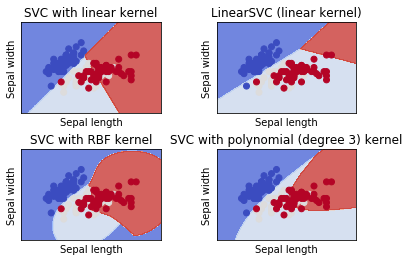

In [48]:
plot_iris(C=100.0)

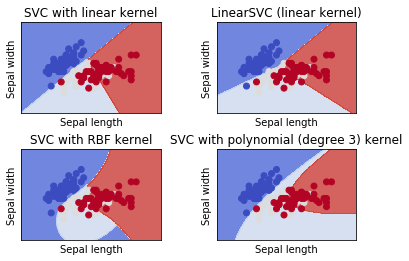

In [49]:
plot_iris(C=5.0)

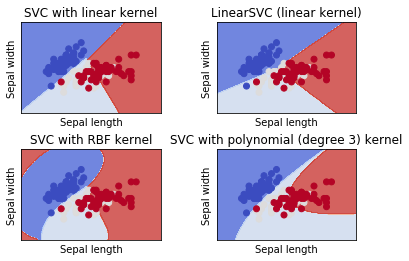

In [50]:
plot_iris(C=1.0)

In [55]:
svc = SVC(gamma="scale")

In [56]:
svc.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=&#39;ovr&#39;, degree=3, gamma=&#39;scale&#39;, kernel=&#39;rbf&#39;,
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
svc.score(X_test, Y_test)

0.7777777777777778

In [61]:
svc = SVC(C=5, gamma="scale")
svc.fit(X_train, Y_train)
svc.score(X_test, Y_test)

0.8571428571428571

In [62]:
svc = SVC(C=0.1, gamma="scale")
svc.fit(X_train, Y_train)
svc.score(X_test, Y_test)

0.5396825396825397